# S09 T01: Practicant amb training i test sets
## Luis Pardina - Data Science - 02/06/2022

### *Exercici 1*: Parteix el conjunt de dades DelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [2]:
original = pd.read_csv('DelayedFlights.csv')
original.drop('Unnamed: 0', axis=1, inplace=True)
pd.set_option('display.max_columns', None)
original.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1936757,2008,12,13,6,1110.0,1103,1413.0,1418,DL,1641,N908DL,123.0,135.0,104.0,-5.0,7.0,SAT,ATL,874,8.0,11.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
original.shape

(1936758, 29)

Trec la columna de l'atribut *Year*, tots els registres són de l'any 2008.



In [4]:
original.Year.unique()

array([2008], dtype=int64)

In [5]:
original.drop('Year', axis=1, inplace=True)

Elimino tots els registres de vols cancel·lats (*Cancelled* == 1) i vols desviats (*Diverted* == 1) perquè a aquests registres l'atribut *ArrDelay* és un Naan i és justament la variable dependent de les regressions que hem de fer a la següent tasca. També elimino les columnes que contenen aquesta informació.

Faig també un reset de l'ìndex per a evitar problemes quan hi concatenem dataframes amb les variables dummys, estandaritzades, etc.

In [6]:
original = original[(original['Diverted'] != 1) & (original['Cancelled'] != 1)].copy()
original.drop(['Cancelled', 'CancellationCode', 'Diverted'], axis=1, inplace=True)

In [7]:
original.reset_index(drop=True, inplace=True)
original.tail()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1928366,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,3.0,0.0,0.0,0.0,22.0
1928367,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0.0,57.0,18.0,0.0,0.0
1928368,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,1.0,0.0,19.0,0.0,79.0
1928369,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,NaN,NaN,NaN,NaN,NaN
1928370,12,13,6,1110.0,1103,1413.0,1418,DL,1641,N908DL,123.0,135.0,104.0,-5.0,7.0,SAT,ATL,874,8.0,11.0,NaN,NaN,NaN,NaN,NaN


In [8]:
original.shape

(1928371, 25)

In [9]:
original.isnull().sum()

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   3
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
dtype: int64

Analitzo què és el que caracteritza als atributs on encara tinc Naan: *CarrierDelay 	WeatherDelay 	NASDelay 	SecurityDelay 	LateAircraftDelay*. En concret, responc a dues preguntes:
1. Quan estan informats i quan són buits(Naan)? Es segueix algun criteri?
2. Hi ha cap relació evident entre ells i la nostra variable depenent, Arr Delay?

La resposta a la primera qüestió és: aquests camps están informats quan el retard a l'arribada *Arr Delay* supera els 15 minuts!!!

In [10]:
round(original[original.CarrierDelay.isnull()].ArrDelay.describe(),2)

count    680883.00
mean          3.56
std           7.84
min        -109.00
25%          -1.00
50%           5.00
75%          10.00
max          14.00
Name: ArrDelay, dtype: float64

In [11]:
round(original[original.CarrierDelay.notnull()].ArrDelay.describe(),2)

count    1247488.00
mean          63.29
std           60.75
min           15.00
25%           26.00
50%           43.00
75%           79.00
max         2461.00
Name: ArrDelay, dtype: float64

Respecte a la segona pregunta, visualitzant la taula es comprova que *ArrDelay* sembla ser la suma d’aquests altres cinc delays. És a dir:

- ArrDelay = CarrierDelay + WeatherDelay + NASDelay + SecurityDelay + LateAircraftDelay (when ArrDelay > 15)

Faig dessota una senzilla comprovació de que aquesta igualtat és compleix a tots els registres. És a dir, resulta que aquests cinc camps son una imputació de minuts de retard a l'arribada a un arbre de causes de l’endarreriment quan ArrDelay ≥ 15 minuts!!

**Conclusió**: Per a després, trobo que no té sentit buscar una correlació quan ja hem descobert positivament que existeix una relació matemàtica entre aquestes variables. No utilitzaré CarrierDelay 	WeatherDelay 	NASDelay 	SecurityDelay 	LateAircraftDelay com a predictors.


In [12]:
a = original[original.CarrierDelay.notnull()].ArrDelay - original[original.CarrierDelay.notnull()].CarrierDelay - original[original.CarrierDelay.notnull()].WeatherDelay - original[original.CarrierDelay.notnull()].NASDelay - original[original.CarrierDelay.notnull()].SecurityDelay - original[original.CarrierDelay.notnull()].LateAircraftDelay 	 

In [13]:
a.unique()

array([0.])

Vaig a veure quantes origens i destinacions diferents hi ha al dataframe, i quantes companyies aèries.

Em surten 303 origens, 302 destinacions, i 20 companyies.

In [14]:
original.Origin.unique().shape

(303,)

In [15]:
original.Dest.unique().shape

(302,)

In [16]:
original.UniqueCarrier.unique().shape

(20,)

In [17]:
round(original.describe(),2)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00
mean,6.11,15.75,3.98,1518.65,1467.72,1610.24,1634.20,2184.30,133.31,134.20,108.28,42.20,43.09,764.95,6.81,18.22,19.18,3.70,15.02,0.09,25.30
std,3.48,8.78,2.00,450.44,424.73,548.00,464.63,1944.45,72.06,71.23,68.64,56.78,53.27,573.89,5.27,14.31,43.55,21.49,33.83,2.02,42.05
min,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,14.00,-21.00,0.00,-109.00,6.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,8.00,2.00,1203.00,1135.00,1316.00,1325.00,611.00,80.00,82.00,58.00,9.00,12.00,338.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00
50%,6.00,16.00,4.00,1545.00,1510.00,1715.00,1705.00,1543.00,116.00,116.00,90.00,24.00,24.00,606.00,6.00,14.00,2.00,0.00,2.00,0.00,8.00
75%,9.00,23.00,6.00,1900.00,1815.00,2030.00,2014.00,3423.00,165.00,165.00,137.00,56.00,53.00,997.00,8.00,21.00,21.00,0.00,15.00,0.00,33.00
max,12.00,31.00,7.00,2400.00,2359.00,2400.00,2359.00,9741.00,1114.00,660.00,1091.00,2461.00,2467.00,4962.00,240.00,422.00,2436.00,1352.00,1357.00,392.00,1316.00


De la observació de les dades numèriques em crida l'atenció que després de netejar vols cancel.lats i desviats hi hagi vols amb AirTime<=10 (179 vols). També és estrany vols que tinguin TaxiIn == 0 o TaxiOut == 0 (173 vols)

Comprovo dessota d'una manera senzilla que ActualElapsedTime = TaxiOut + AirTime + TaxiIn a tots els registres del DataFrame.

**Conclusió**: comparant aquests 3 temps (TaxiOut + AirTime + TaxiIn) amb la distancia entre origen i destinació, es veu que la divisió del ActualElapsedTime en aquests tres sumands no és sempre consistent, p.ex. no té sentit un temps de vol == 0 quan hi han distancies considerables del vol. Es poden visualitzar aquestes anomalies als gràfics. S'haurien de netejar les dades, però donat que no semblen massa registres afectats i per a no allargar massa l'exercici no ho faré.

In [18]:
original[original.AirTime <= 10]

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
32838,1,5,6,2245.0,1950,2346.0,2108,XE,7784,N12167,61.0,78.0,3.0,158.0,175.0,SFO,LAX,337,11.0,47.0,0.0,3.0,0.0,0.0,155.0
45468,1,24,4,1212.0,1155,1347.0,1343,YV,7375,N593ML,35.0,48.0,7.0,4.0,17.0,ORD,SBN,84,14.0,14.0,NaN,NaN,NaN,NaN,NaN
52351,1,3,4,2129.0,2103,2224.0,2200,OO,3679,N581SW,55.0,57.0,1.0,24.0,26.0,SLC,PIH,150,5.0,49.0,0.0,0.0,0.0,0.0,24.0
53359,1,5,6,2128.0,2103,2220.0,2200,OO,3679,N581SW,52.0,57.0,4.0,20.0,25.0,SLC,PIH,150,5.0,43.0,0.0,0.0,0.0,0.0,20.0
53369,1,5,6,1842.0,1715,1949.0,1824,OO,3694,N581SW,67.0,69.0,2.0,85.0,87.0,SLC,SUN,223,2.0,63.0,0.0,0.0,0.0,0.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905090,12,19,5,1024.0,1007,1050.0,1033,AS,65,N775AS,26.0,26.0,8.0,17.0,17.0,WRG,PSG,31,6.0,12.0,0.0,0.0,0.0,0.0,17.0
1905095,12,20,6,1032.0,1007,1050.0,1033,AS,65,N791AS,18.0,26.0,8.0,17.0,25.0,WRG,PSG,31,4.0,6.0,0.0,0.0,0.0,0.0,17.0
1905358,12,21,7,1233.0,1007,1251.0,1033,AS,65,N792AS,18.0,26.0,10.0,138.0,146.0,WRG,PSG,31,3.0,5.0,0.0,0.0,0.0,0.0,138.0
1905942,12,24,3,1046.0,1007,1109.0,1033,AS,65,N760AS,23.0,26.0,9.0,36.0,39.0,WRG,PSG,31,5.0,9.0,0.0,0.0,0.0,0.0,36.0


In [19]:
original[(original.TaxiIn == 0)|(original.TaxiOut == 0)]

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
46919,1,2,3,1915.0,1735,2140.0,2012,OH,5456,N693CA,85.0,97.0,76.0,88.0,100.0,MCI,CVG,539,0.0,9.0,0.0,88.0,0.0,0.0,0.0
48565,1,14,1,936.0,930,1208.0,1206,OH,5086,N676CA,152.0,156.0,136.0,2.0,6.0,FLL,CVG,932,0.0,16.0,NaN,NaN,NaN,NaN,NaN
49288,1,18,5,1655.0,1609,1930.0,1900,OH,5228,N689CA,155.0,171.0,134.0,30.0,46.0,MIA,CVG,948,0.0,21.0,0.0,0.0,0.0,0.0,30.0
49296,1,18,5,1840.0,1833,2005.0,2009,OH,5250,N693CA,85.0,96.0,70.0,-4.0,7.0,RDU,CVG,390,0.0,15.0,NaN,NaN,NaN,NaN,NaN
49440,1,19,6,2110.0,1615,2325.0,1848,OH,4970,N811CA,75.0,93.0,62.0,277.0,295.0,BHM,CVG,396,0.0,13.0,277.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448201,9,28,7,1926.0,1914,2108.0,2100,YV,7308,N516LR,102.0,106.0,80.0,8.0,12.0,JAX,IAD,631,0.0,22.0,NaN,NaN,NaN,NaN,NaN
1451352,9,29,1,1705.0,1620,1920.0,1837,OH,6283,N678CA,75.0,77.0,55.0,43.0,45.0,ORD,CVG,264,0.0,20.0,0.0,43.0,0.0,0.0,0.0
1453911,9,12,5,2102.0,2055,2202.0,2201,OO,3596,N586SW,60.0,66.0,47.0,1.0,7.0,SLC,SUN,223,0.0,13.0,NaN,NaN,NaN,NaN,NaN
1714875,11,2,7,2302.0,1555,139.0,1855,B6,468,N715JB,157.0,180.0,147.0,404.0,427.0,RSW,BOS,1249,0.0,10.0,404.0,0.0,0.0,0.0,0.0


In [20]:
a = original.ActualElapsedTime - original.TaxiIn - original.TaxiOut - original.AirTime	 

In [21]:
a.unique()

array([0.])

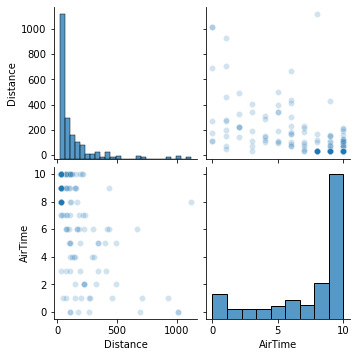

In [29]:
cols = ['Distance', 'AirTime']
sns.pairplot(original[original.AirTime <= 10][cols], diag_kind='hist', plot_kws={'alpha': 0.2});

Per a acabar, en preparació de la següent tasca i com a cloenda d'aquest análisi exploratori, vaig a veure la correlació d'*ArrDelay* amb la resta de variables numèriques.

Hi ha una correlació molt forta (0.95!!) entre ArrDelay y DepDelay. No és cap sorpresa: si l'avió surt tard ben probablement arribarà tard.

De CarrierDelay + WeatherDelay + NASDelay + SecurityDelay + LateAircraftDelay ja he parlat abans.

També és interessant la correlació, més petita però no zero, amb TaxiIn i amb TaxiOut. El TaxiOut 
es l'aproximació des del *finger* fins a la pista d'enlairament i el Taxi In l'aproximació al finger un cop l'avió ha aterrat.També em sembla prou lògic que si aquests processos duren molt de temps (perquè hi ha cua d'avions per a enlairar-se, etc) hi hagi un retard a l'arribada.

I per acabar també em crida l'atenció que hi hagi una petita correlació amb... Departure Time. Després ho visualitzaré, però és plausible que el ArrDelay vagi augmentant al llarg del dia, la qual cosa explicaria que es veiés aquesta petita correlació.

In [30]:
original.corr()['ArrDelay'][:]

Month               -0.000897
DayofMonth           0.004129
DayOfWeek            0.006123
DepTime              0.127017
CRSDepTime           0.044447
ArrTime             -0.050948
CRSArrTime           0.043078
FlightNum            0.061266
ActualElapsedTime    0.068130
CRSElapsedTime      -0.015676
AirTime             -0.000189
ArrDelay             1.000000
DepDelay             0.952927
Distance            -0.029853
TaxiIn               0.156277
TaxiOut              0.286484
CarrierDelay         0.501773
WeatherDelay         0.264624
NASDelay             0.387606
SecurityDelay       -0.002488
LateAircraftDelay    0.478123
Name: ArrDelay, dtype: float64

Primer genero una mostra d'un 10% del dataset, perquè per fer els models de regressió de la tasca 2 el temps de processat seria massa llarg per a tot el conjunt. Després, d'aquesta mostra extrauré els *subsets*, per train i test.

He de fer la conversió a np.arrays de la DataFrame.

In [31]:
y = np.array(original['ArrDelay'])
X = original.drop('ArrDelay', axis = 1)

X_list = list(X.columns)
X = np.array(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=40)

Em genero les quatre DataFrames corresponents:

In [32]:
X_train_df = pd.DataFrame(X_train, columns=X_list)
X_test_df = pd.DataFrame(X_test, columns=X_list)
y_train_df = pd.DataFrame(y_train, columns=['ArrDelay'])
y_test_df = pd.DataFrame(y_test, columns=['ArrDelay'])

Comprovo amb un test d'hipòtesi si la mostra i el dataset de la variable depenent segueixen una mateixa distribució:
- H0: les mitjanes de *"ArrDelay"* a *y_train* i *y_test* són iguals
- H1: les mitjanes no són iguals

In [33]:
alpha = 0.05
stat, p = ttest_ind(y_train_df.ArrDelay, y_test_df.ArrDelay, equal_var=True)
print(f'stat: {stat:.4}, p: {p}, alpha:{alpha}')
if p > alpha:
    print('p > alpha : H0 cannot be refused. Probably the same distribution')
else:
    print('p < alpha : H0 can be refused. Probably different distributions')

stat: 0.41, p: 0.6817982945740124, alpha:0.05
p > alpha : H0 cannot be refused. Probably the same distribution


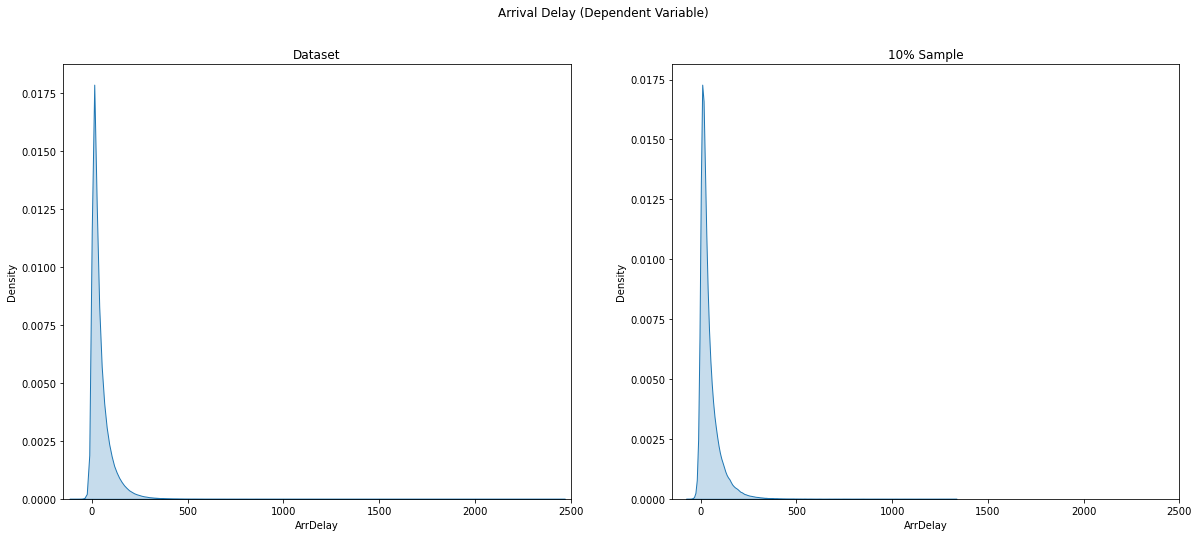

In [34]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.kdeplot(data=y_train_df, x='ArrDelay', palette="pastel",fill = True).set(xlim=(-150, 2500))
plt.title('Dataset')
plt.subplot(1, 2, 2)
sns.kdeplot(data=y_test_df, x='ArrDelay', palette="pastel",fill = True).set(xlim=(-150, 2500))
plt.title('10% Sample')
plt.suptitle('Arrival Delay (Dependent Variable)');

La mostra i el dataset tenen valors de mitjana, quartils i std molt semblants per a la variable depenent

In [35]:
round(y_train_df.describe(),2)

,ArrDelay
count,1735533.00
mean,42.21
std,56.86
min,-109.00
25%,9.00
50%,24.00
75%,56.00
max,2461.00


In [36]:
round(y_test_df.describe(),2)

,ArrDelay
count,192838.00
mean,42.15
std,56.07
min,-63.00
25%,9.00
50%,24.00
75%,56.00
max,1322.00


Mirem ara els predictors. Trio tres variables numèriques: "DepDelay", "TaxiOut" i "AirTime" per a aplicar el test d'hipòtesi:

In [37]:
alpha = 0.05
stat, p = ttest_ind(X_train_df.DepDelay, X_test_df.DepDelay, equal_var=True)
print(f'stat: {stat:.4}, p: {p}, alpha:{alpha}')
if p > alpha:
    print('p > alpha : H0 cannot be refused. Probably the same distribution')
else:
    print('p < alpha : H0 can be refused. Probably different distributions')

stat: 0.6883, p: 0.4912599036129708, alpha:0.05
p > alpha : H0 cannot be refused. Probably the same distribution


In [38]:
alpha = 0.05
stat, p = ttest_ind(X_train_df.TaxiOut, X_test_df.TaxiOut, equal_var=True)
print(f'stat: {stat:.4}, p: {p}, alpha:{alpha}')
if p > alpha:
    print('p > alpha : H0 cannot be refused. Probably the same distribution')
else:
    print('p < alpha : H0 can be refused. Probably different distributions')

stat: -0.9683, p: 0.33289331109140374, alpha:0.05
p > alpha : H0 cannot be refused. Probably the same distribution


In [39]:
alpha = 0.05
stat, p = ttest_ind(X_train_df.AirTime, X_test_df.AirTime, equal_var=True)
print(f'stat: {stat:.4}, p: {p}, alpha:{alpha}')
if p > alpha:
    print('p > alpha : H0 cannot be refused. Probably the same distribution')
else:
    print('p < alpha : H0 can be refused. Probably different distributions')

stat: -0.509, p: 0.61073060747314, alpha:0.05
p > alpha : H0 cannot be refused. Probably the same distribution


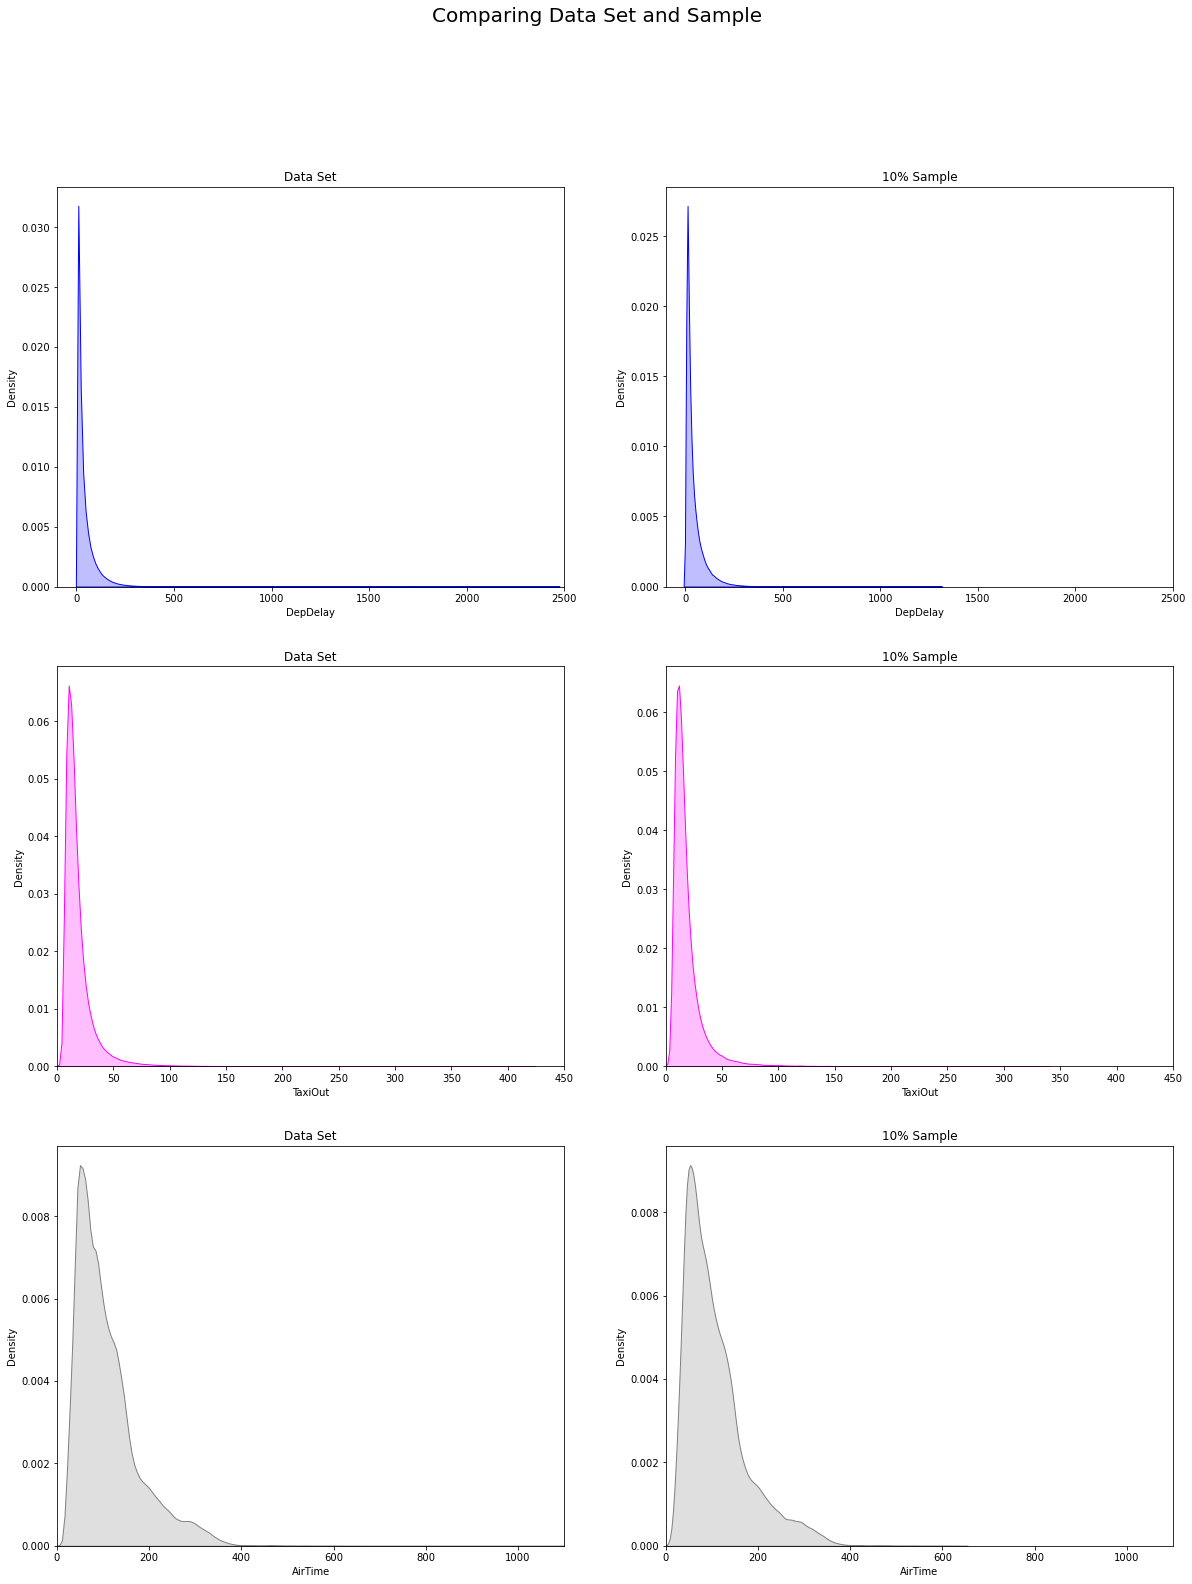

In [40]:
plt.figure(figsize=(20, 25))
plt.subplot(3, 2, 1)
sns.kdeplot(data=X_train_df, x='DepDelay', color="blue", fill = True).set(xlim=(-100, 2500))
plt.title('Data Set')
plt.subplot(3, 2, 2)
sns.kdeplot(data=X_test_df, x='DepDelay', color="blue", fill = True).set(xlim=(-100, 2500))
plt.title('10% Sample')
plt.subplot(3, 2, 3)
sns.kdeplot(data=X_train_df, x='TaxiOut', color="magenta", fill = True).set(xlim=(0, 450))
plt.title('Data Set')
plt.subplot(3, 2, 4)
sns.kdeplot(data=X_test_df, x='TaxiOut', color="magenta", fill = True).set(xlim=(0, 450))
plt.title('10% Sample')
plt.subplot(3, 2, 5)
sns.kdeplot(data=X_train_df, x='AirTime', color="grey", fill = True).set(xlim=(0, 1100))
plt.title('Data Set')
plt.subplot(3, 2, 6)
sns.kdeplot(data=X_test_df, x='AirTime', color="grey", fill = True).set(xlim=(0, 1100))
plt.title('10% Sample')
plt.suptitle('Comparing Data Set and Sample', fontsize = 20);

Per a acabar l'exercici, comprovo que la distribució d'un regressor categòric (trio "UniqueCarrier") també es semblant. En tots dos casos la moda és el mateix valor ('WN') i no només aixó sino que al pareto es veu que la seqüència ordenada de més gran a més petit es també la mateixa.

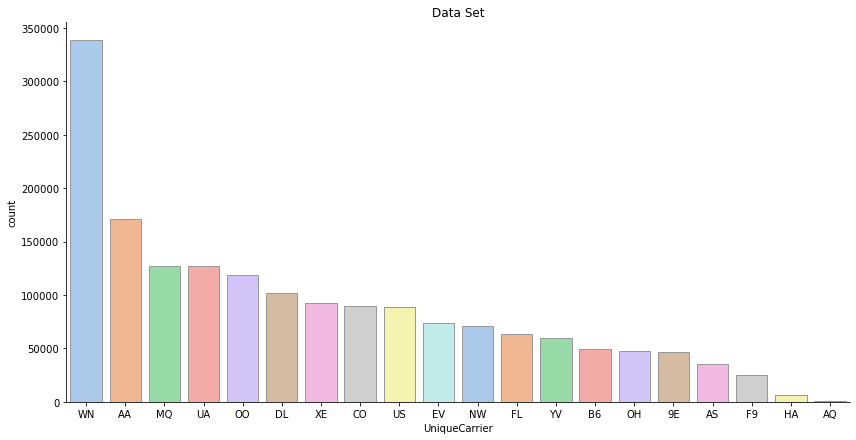

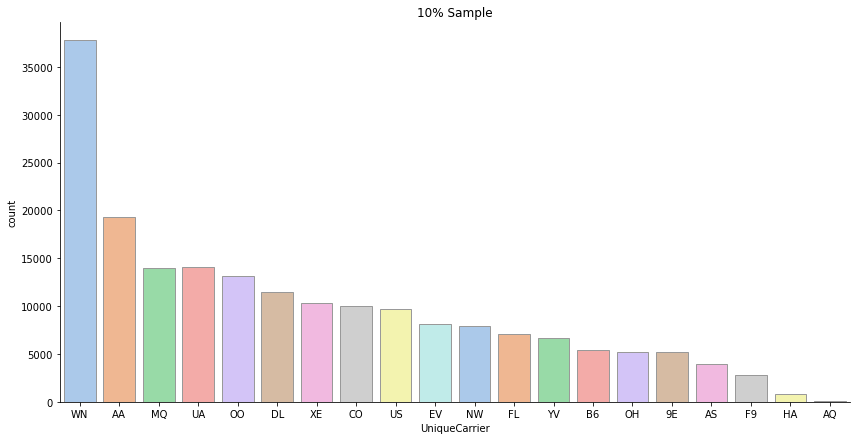

In [41]:
#sns.set(font_scale = 1.5)
plot_order = X_train_df.groupby('UniqueCarrier').DayOfWeek.count().sort_values(ascending=False).index

sns.catplot(x="UniqueCarrier", kind="count",
            palette="pastel", edgecolor=".6", height = 6, aspect = 2,
            data=X_train_df, order=plot_order) 
plt.title('Data Set')
sns.catplot(x="UniqueCarrier", kind="count",
            palette="pastel", edgecolor=".6", height = 6, aspect = 2,
           data=X_test_df, order=plot_order);
plt.title('10% Sample');

### *Exercici 2*: Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

A partir d'ara, treballaré amb la mostra del 10% dels valors del dataset per a la resta d'aquesta tasca i per a la propera tasca.

In [42]:
mostra_X = X_test_df
mostra_y = y_test_df

In [43]:
mostra_X.shape

(192838, 24)

In [44]:
mostra_y.shape

(192838, 1)

Primer vaig a normalitzar les dades numeriques discretes relatives al temps, les quals sigui plausible que siguin predictors de l'ArrDelay:
- Month: perquè pot haver-hi efectes d'estacionalitat (estiu/hivern)
- DayOfWeek: pot presentar un comportament cíclic, segons el dia de la setmana
- CRSDepTime: crearé grups (un per hora), perque també pot haver un comportament diferent segons l'hora del dia **prevista** per a la sortida del vol.

In [45]:
mostra_X.CRSDepTime = mostra_X.CRSDepTime//100

In [46]:
mostra_X.CRSDepTime.unique()

array([14, 21, 9, 8, 13, 19, 11, 18, 16, 15, 17, 12, 7, 5, 20, 6, 10, 22,
       0, 23, 1, 2, 4, 3], dtype=object)

In [47]:
normalized = ['Month','DayOfWeek','CRSDepTime']
mms = MinMaxScaler()
Xmms = mms.fit_transform(mostra_X[normalized])

In [48]:
standard_names=[]
for i in normalized:
    standard_names.append("norm_"+i)
mostra_X = pd.concat([mostra_X, pd.DataFrame(Xmms, columns=standard_names)], axis=1)

A continuació vaig a crear columnes *dummies* de les variables categòriques les quals sigui plausible que siguin predictors de l'ArrDelay:
per a la sortida del vol.
- UniqueCarrier: diferents companyies poden ser més o menys puntuals per múltiples causes organitzatives

Podria incloure-hi també l'origen, la destinació i el número de vol, pero em multiplicaria per molt el numero de columnes.

In [49]:
mostra_X = pd.concat([mostra_X, pd.get_dummies(mostra_X['UniqueCarrier'])], axis=1)

In [50]:
mostra_X.shape

(192838, 47)

In [51]:
mostra_X.tail()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,norm_Month,norm_DayOfWeek,norm_CRSDepTime,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
192833,3,18,2,1418.0,14,1632.0,1607,XE,2995,N41104,194.0,187.0,178.0,18.0,EWR,MSP,1008,4.0,12.0,0.0,0.0,7.0,0.0,18.0,0.181818,0.166667,0.608696,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
192834,1,23,3,1347.0,13,1609.0,1615,WN,331,N311SW,142.0,165.0,131.0,17.0,MCO,CLE,895,4.0,7.0,NaN,NaN,NaN,NaN,NaN,0.000000,0.333333,0.565217,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
192835,4,10,4,2205.0,21,2349.0,2325,AA,1509,N5DMAA,224.0,230.0,197.0,30.0,ORD,LAS,1515,7.0,20.0,0.0,0.0,24.0,0.0,0.0,0.272727,0.500000,0.913043,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
192836,1,6,7,1258.0,12,1401.0,1310,MQ,3338,N263AE,63.0,55.0,30.0,43.0,TYR,DFW,103,19.0,14.0,0.0,0.0,8.0,0.0,43.0,0.000000,1.000000,0.521739,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
192837,2,22,5,1701.0,16,1708.0,1635,WN,1660,N227WN,67.0,65.0,53.0,31.0,PHX,LAS,256,4.0,10.0,31.0,0.0,2.0,0.0,0.0,0.090909,0.666667,0.695652,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


A continuació vaig a estandaritzar columnes amb les variables numèriques les quals sigui plausible que siguin predictors de l'ArrDelay:

    - 'ActualElapsedTime', que és la duració total del vol 
    - 'CRSElapsedTime' que és la duració prevista del vol
    - 'AirTime' que és el temps a l'aire de l'avió
    - 'Distance', que tindrà correlació amb 'Airtime'
    - 'DepDelay', el retard respecte a l'hora de sortida prevista
    - 'TaxiOut', el temps des de que l'avió ha sortit del finger fins que ha despegat
    - 'TaxiIn', el temps des de que l'avio ha tocat terra fins que arriba al finger


In [52]:
standardized = ['ActualElapsedTime','CRSElapsedTime','AirTime', 'Distance','DepDelay','TaxiIn','TaxiOut']

Com a criteri per a estandaritzar utilitzaré el Robust Scaler, perque totes aquestes variables tenen molts outliers.

In [53]:
rs = RobustScaler()
Xrs = rs.fit_transform(mostra_X[standardized])

In [54]:
Xrs.shape

(192838, 7)

In [55]:
standard_names=[]
for i in standardized:
    standard_names.append("stand_"+i)
mostra_X = pd.concat([mostra_X, pd.DataFrame(Xrs, columns=standard_names)], axis=1)

In [56]:
mostra_X.shape

(192838, 54)

### *Exercici 3*: Resumeix les noves columnes generades de manera estadística i gràfica

In [57]:
mostra_X.tail()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,norm_Month,norm_DayOfWeek,norm_CRSDepTime,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV,stand_ActualElapsedTime,stand_CRSElapsedTime,stand_AirTime,stand_Distance,stand_DepDelay,stand_TaxiIn,stand_TaxiOut
192833,3,18,2,1418.0,14,1632.0,1607,XE,2995,N41104,194.0,187.0,178.0,18.0,EWR,MSP,1008,4.0,12.0,0.0,0.0,7.0,0.0,18.0,0.181818,0.166667,0.608696,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.917647,0.855422,1.1000,0.609091,-0.146341,-0.50,-0.181818
192834,1,23,3,1347.0,13,1609.0,1615,WN,331,N311SW,142.0,165.0,131.0,17.0,MCO,CLE,895,4.0,7.0,NaN,NaN,NaN,NaN,NaN,0.000000,0.333333,0.565217,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.305882,0.590361,0.5125,0.437879,-0.170732,-0.50,-0.636364
192835,4,10,4,2205.0,21,2349.0,2325,AA,1509,N5DMAA,224.0,230.0,197.0,30.0,ORD,LAS,1515,7.0,20.0,0.0,0.0,24.0,0.0,0.0,0.272727,0.500000,0.913043,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.270588,1.373494,1.3375,1.377273,0.146341,0.25,0.545455
192836,1,6,7,1258.0,12,1401.0,1310,MQ,3338,N263AE,63.0,55.0,30.0,43.0,TYR,DFW,103,19.0,14.0,0.0,0.0,8.0,0.0,43.0,0.000000,1.000000,0.521739,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-0.623529,-0.734940,-0.7500,-0.762121,0.463415,3.25,0.000000
192837,2,22,5,1701.0,16,1708.0,1635,WN,1660,N227WN,67.0,65.0,53.0,31.0,PHX,LAS,256,4.0,10.0,31.0,0.0,2.0,0.0,0.0,0.090909,0.666667,0.695652,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.576471,-0.614458,-0.4625,-0.530303,0.170732,-0.50,-0.363636


Un cop normalitzades, faig les següents **observacions**:
- hi ha dos grups de variabilitat: per un costat les variables relacionades amb la distància o el temps total (Actual Elapsed Time, CRS Elapsed Time i Distance) que tenen una std al voltant de 0.85; per altre costat, les relacionades amb el retard (DepDelay i ArrDelay) mostren una std més gran, al voltant de 1.3, degut al gran nombre de outliers que tenen.
- De les tres variables que constitueixen el temps de vol (Actual Elapsed Time = Taxi In + Air Time + Taxi Out), mentre que Air Time estaria al primer grup de variabilitat, Taxi In i Taxi Out ho estan al segon. Pel que fa a la generació de retards respecte als horaris previstos, els processos inicials i finals del vol amb l'avió al terra de l'aeroport hi tenen una molt més gran contribució que el temps que l'avió està volant.

In [58]:
round(mostra_X[standard_names].describe(),2)

,stand_ActualElapsedTime,stand_CRSElapsedTime,stand_AirTime,stand_Distance,stand_DepDelay,stand_TaxiIn,stand_TaxiOut
count,192838.00,192838.00,192838.00,192838.00,192838.00,192838.00,192838.00
mean,0.20,0.22,0.23,0.24,0.46,0.20,0.39
std,0.85,0.86,0.86,0.87,1.28,1.32,1.30
min,-1.16,-1.37,-1.12,-0.87,-0.44,-1.50,-1.27
25%,-0.42,-0.41,-0.40,-0.41,-0.29,-0.50,-0.36
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.58,0.59,0.60,0.59,0.71,0.50,0.64
max,6.67,6.55,6.84,6.60,31.20,48.25,29.36


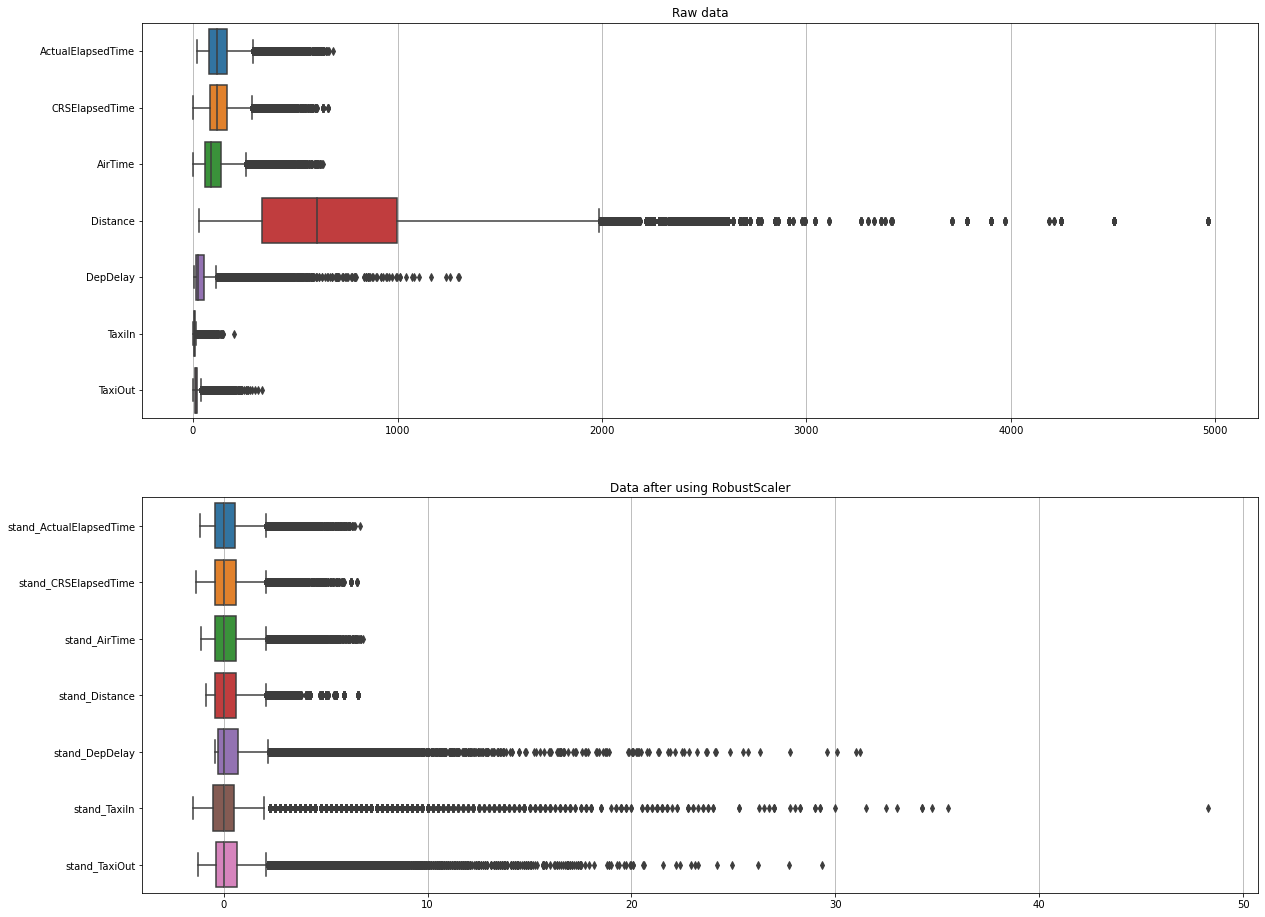

In [59]:
plt.figure(figsize=(20,16))

plt.subplot(2,1,1)
sns.boxplot(data=mostra_X[standardized], orient='h');
plt.title('Raw data')
plt.grid(axis='x')

plt.subplot(2,1,2)
sns.boxplot(data=mostra_X[standard_names], orient='h');
plt.title('Data after using RobustScaler')
plt.grid(axis='x');


In [60]:
type(mostra_X)

pandas.core.frame.DataFrame

In [61]:
type(mostra_y)

pandas.core.frame.DataFrame

In [62]:
mostra_X.to_csv('mostra_X.csv')

In [64]:
mostra_y.to_csv('mostra_y.csv')